In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics

In [2]:
path= 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv'
path

'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv'

In [3]:
df = pd.read_csv(path)
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [5]:
# since decision tree model does not care about magnitude of numeric value
# use label encoder to convert categorical value into numeric value
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['BP'] = label_encoder.fit_transform(df['BP'])
df['Cholesterol'] = label_encoder.fit_transform(df['Cholesterol'])
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY
...,...,...,...,...,...,...
195,56,0,1,0,11.567,drugC
196,16,1,1,0,12.006,drugC
197,52,1,2,0,9.894,drugX
198,23,1,2,1,14.020,drugX


In [7]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [8]:
custom_map = {'drugA': 0, 'drugB': 1, 'drugC': 2, 'drugX': 3, 'drugY': 4}
df['Drug_num'] = df['Drug'].map(custom_map)
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Drug_num
0,23,0,0,0,25.355,drugY,4
1,47,1,1,0,13.093,drugC,2
2,47,1,1,0,10.114,drugC,2
3,28,0,2,0,7.798,drugX,3
4,61,0,1,0,18.043,drugY,4
...,...,...,...,...,...,...,...
195,56,0,1,0,11.567,drugC,2
196,16,1,1,0,12.006,drugC,2
197,52,1,2,0,9.894,drugX,3
198,23,1,2,1,14.020,drugX,3


In [11]:
# find the correlation of each feature on the target value
df_2 = df.drop('Drug', axis = 1)
df_2.corr()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug_num
Age,1.000000,0.102027,0.054212,-0.068234,-0.063119,-0.004828
Sex,0.102027,1.000000,-0.007814,-0.008811,-0.125008,-0.098573
BP,0.054212,-0.007814,1.000000,-0.137552,-0.149312,0.372868
Cholesterol,-0.068234,-0.008811,-0.137552,1.000000,0.010000,0.055629
Na_to_K,-0.063119,-0.125008,-0.149312,0.010000,1.000000,0.589120
Drug_num,-0.004828,-0.098573,0.372868,0.055629,0.589120,1.000000


In [14]:
# understand the distribution of the dataset by plotting the count of the records
category_counts = df['Drug'].value_counts()
category_counts

Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

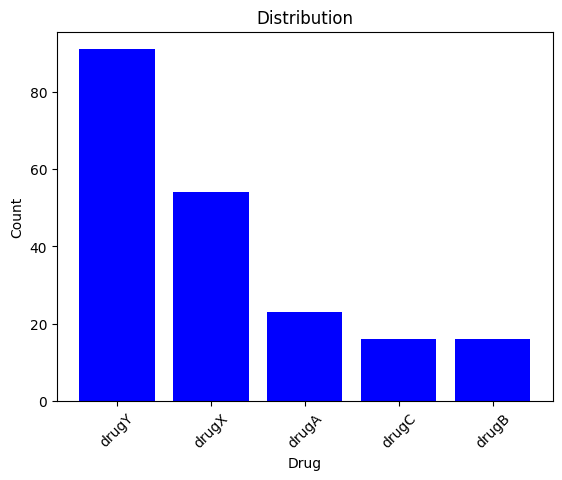

In [15]:
# plot the count plot
plt.bar(category_counts.index, category_counts.values, color = 'blue')
plt.xlabel('Drug')
plt.ylabel('Count')
plt.title('Distribution')
plt.xticks(rotation = 45)
plt.show()

In [20]:
# before modeling, we split the dataset into traning set and testing set
y = df['Drug']
x = df.drop(['Drug', 'Drug_num'], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [21]:
drug_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)

In [22]:
drug_tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [23]:
# evaluation
tree_prediction = drug_tree.predict(x_test)

In [24]:
metrics.accuracy_score(y_test, tree_prediction)

1.0

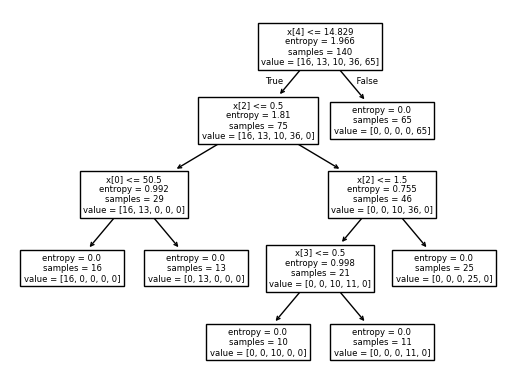

In [25]:
# visualize the tree
plot_tree(drug_tree)
plt.show()